In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
file_name ={'orders':'olist_orders_dataset',
            'order_items':'olist_order_items_dataset',
            'products':'olist_products_dataset',
            'eng_product_cate':'product_category_name_translation',
            'customers': 'olist_customers_dataset',
            'sellers': 'olist_sellers_dataset',
            'payments':'olist_order_payments_dataset',
            'reviews':'olist_order_reviews_dataset',
            'geolocation':'olist_geolocation_dataset'}
for name in file_name.keys(): locals()[name] = pd.read_csv(file_name[name]+'.csv')
dataset_name = file_name.keys()
df_columns_name = pd.DataFrame([globals()[i].columns for i in dataset_name], index = dataset_name).T
df_columns_name

,orders,order_items,products,eng_product_cate,customers,sellers,payments,reviews,geolocation
0,order_id,order_id,product_id,product_category_name,customer_id,seller_id,order_id,review_id,geolocation_zip_code_prefix
1,customer_id,order_item_id,product_category_name,product_category_name_english,customer_unique_id,seller_zip_code_prefix,payment_sequential,order_id,geolocation_lat
2,order_status,product_id,product_name_lenght,None,customer_zip_code_prefix,seller_city,payment_type,review_score,geolocation_lng
3,order_purchase_timestamp,seller_id,product_description_lenght,None,customer_city,seller_state,payment_installments,review_comment_title,geolocation_city
4,order_approved_at,shipping_limit_date,product_photos_qty,None,customer_state,None,payment_value,review_comment_message,geolocation_state
5,order_delivered_carrier_date,price,product_weight_g,None,None,None,None,review_creation_date,None
6,order_delivered_customer_date,freight_value,product_length_cm,None,None,None,None,review_answer_timestamp,None
7,order_estimated_delivery_date,None,product_height_cm,None,None,None,None,None,None
8,None,None,product_width_cm,None,None,None,None,None,None


In [3]:
retail = orders.merge(order_items, on='order_id')\
        .merge(products, on='product_id')\
        .merge(eng_product_cate, on='product_category_name')\
        .merge(customers, on='customer_id')\
        .merge(sellers, on='seller_id').merge(payments, on='order_id')\
        .merge(reviews, on='order_id').merge(geolocation, left_on='customer_zip_code_prefix', right_on='geolocation_zip_code_prefix')
        # .merge(geolocation, left_on='seller_zip_code_prefix', right_on='geolocation_zip_code_prefix')

In [19]:
geolocation

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP
...,...,...,...,...,...
1000158,99950,-28.068639,-52.010705,tapejara,RS
1000159,99900,-27.877125,-52.224882,getulio vargas,RS
1000160,99950,-28.071855,-52.014716,tapejara,RS
1000161,99980,-28.388932,-51.846871,david canabarro,RS


In [4]:
retail.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,87285b34884572647811a353c7ac498a,...,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,3149,-23.574809,-46.587471,sao paulo,SP
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,87285b34884572647811a353c7ac498a,...,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,3149,-23.578333,-46.587123,sao paulo,SP
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,87285b34884572647811a353c7ac498a,...,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,3149,-23.574809,-46.587471,sao paulo,SP
3,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,87285b34884572647811a353c7ac498a,...,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,3149,-23.575033,-46.587451,sao paulo,SP
4,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,87285b34884572647811a353c7ac498a,...,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,3149,-23.580054,-46.586673,sao paulo,SP


In [5]:
retail.shape

(17658865, 45)

In [6]:
missing_values = retail.isnull().sum(axis=0)/len(retail)*100

In [23]:
missing_values.sort_values(ascending= False)

review_comment_title             88.645793
review_comment_message           58.790851
order_delivered_customer_date     1.948047
order_delivered_carrier_date      1.040288
order_approved_at                 0.015998
product_height_cm                 0.000612
product_length_cm                 0.000612
product_width_cm                  0.000612
product_weight_g                  0.000612
order_purchase_timestamp          0.000000
order_status                      0.000000
order_id                          0.000000
customer_id                       0.000000
price                             0.000000
shipping_limit_date               0.000000
seller_id                         0.000000
product_id                        0.000000
order_item_id                     0.000000
order_estimated_delivery_date     0.000000
product_description_lenght        0.000000
product_name_lenght               0.000000
product_photos_qty                0.000000
product_category_name_english     0.000000
customer_un

In [24]:
retail.dropna(subset=['order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date'], inplace=True)
retail.shape

(17311915, 45)

In [7]:
retail.dtypes

order_id                          object
customer_id                       object
order_status                      object
order_purchase_timestamp          object
order_approved_at                 object
order_delivered_carrier_date      object
order_delivered_customer_date     object
order_estimated_delivery_date     object
order_item_id                      int64
product_id                        object
seller_id                         object
shipping_limit_date               object
price                            float64
freight_value                    float64
product_category_name             object
product_name_lenght              float64
product_description_lenght       float64
product_photos_qty               float64
product_weight_g                 float64
product_length_cm                float64
product_height_cm                float64
product_width_cm                 float64
product_category_name_english     object
customer_unique_id                object
customer_zip_cod

In [8]:
retail.describe().loc[['mean', 'min', '25%', '50%', '75%', 'max']]

,order_item_id,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,customer_zip_code_prefix,seller_zip_code_prefix,payment_sequential,payment_installments,payment_value,review_score,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
mean,1.205037,121.460215,19.643865,48.661454,778.819087,2.19269,2153.670491,30.520948,16.720346,23.181574,32717.957649,25176.03093,1.09084,2.939432,174.482345,4.032775,32717.957649,-21.973650,-45.951080
min,1.000000,0.850000,0.000000,5.000000,4.000000,1.00000,0.000000,7.000000,2.000000,6.000000,1003.000000,1001.00000,1.00000,0.000000,0.000000,1.000000,1003.000000,-36.605374,-101.466766
25%,1.000000,39.900000,13.470000,42.000000,341.000000,1.00000,300.000000,18.000000,8.000000,15.000000,13140.000000,6790.00000,1.00000,1.000000,61.750000,4.000000,13140.000000,-23.576990,-47.628217
50%,1.000000,74.990000,16.270000,51.000000,595.000000,1.00000,700.000000,25.000000,13.000000,20.000000,23860.000000,13920.00000,1.00000,1.000000,109.840000,5.000000,23860.000000,-22.910779,-46.460430
75%,1.000000,135.000000,20.400000,57.000000,975.000000,3.00000,1825.000000,39.000000,20.000000,30.000000,38400.000000,30315.00000,1.00000,4.000000,192.120000,5.000000,38400.000000,-20.446226,-43.351893
max,21.000000,6735.000000,409.680000,76.000000,3992.000000,20.00000,40425.000000,105.000000,105.000000,118.000000,99980.000000,99730.00000,29.00000,24.000000,13664.080000,5.000000,99980.000000,45.065933,13.820214


### A. Show the correlation of the features in Retail dataset and share your insights.

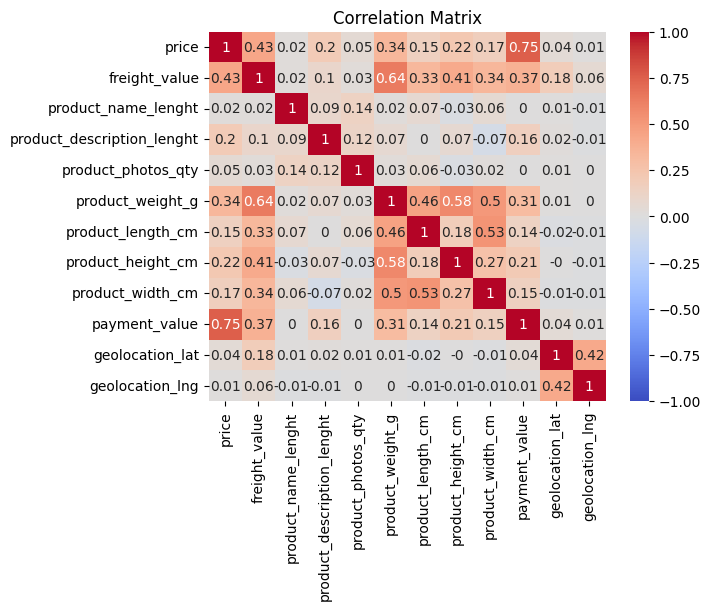

In [14]:
retail_numerical = retail.select_dtypes(include=['float64'])
corr = np.round(retail_numerical.corr(), 2)
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

## B. Show the customer_state and count of Customer_city in state as single output and visualize the same.

In [37]:
cnt_cust_city = retail.groupby('customer_state')['customer_city'].nunique().reset_index()
cnt_cust_city = cnt_cust_city.rename(columns={'customer_city': 'customer_city_count'})
cnt_cust_city = cnt_cust_city.sort_values(by='customer_city_count', ascending = False)
cnt_cust_city

,customer_state,customer_city_count
10,MG,732
25,SP,623
22,RS,370
17,PR,355
4,BA,348
23,SC,239
8,GO,174
5,CE,159
15,PE,150
18,RJ,140


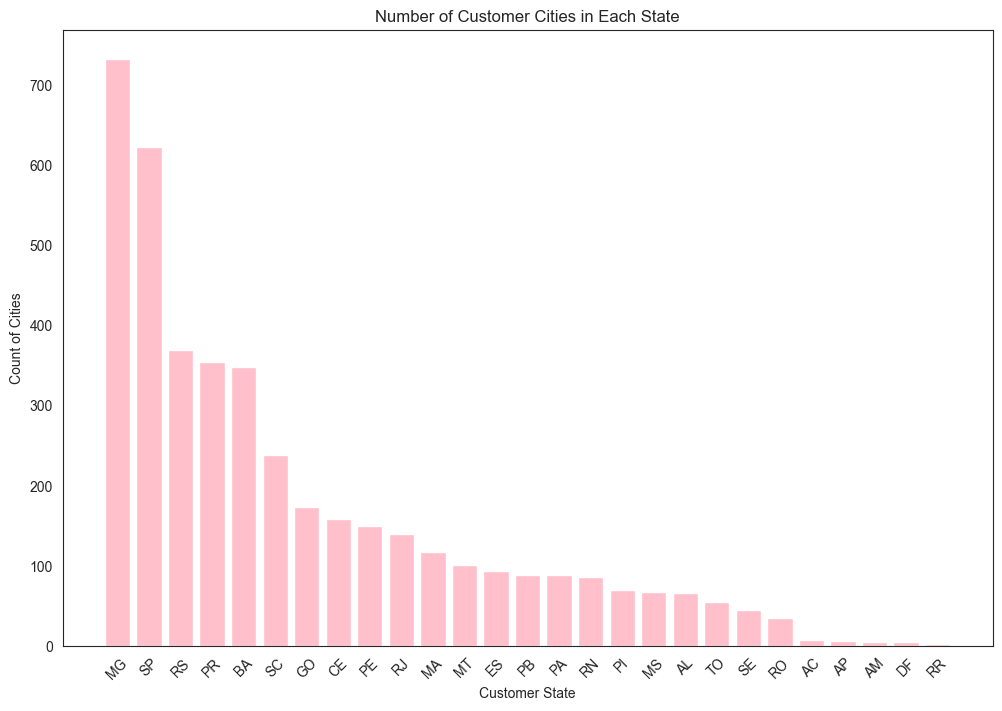

In [41]:
plt.figure(figsize=(12, 8))
plt.bar(cnt_cust_city['customer_state'], cnt_cust_city['customer_city_count'], color = "Pink")
plt.xticks(rotation=45)


plt.xlabel('Customer State')
plt.ylabel('Count of Cities')
plt.title('Number of Customer Cities in Each State')

plt.show()

## C. Print top 10 categories Sold and visualize the same.

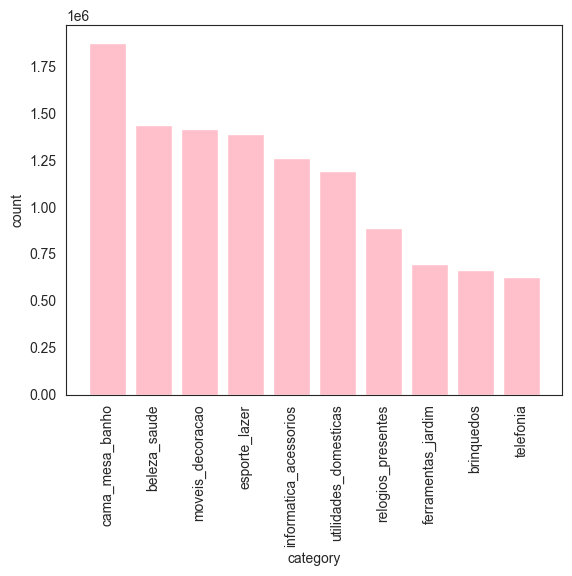

In [18]:
result = retail.groupby('product_category_name')['order_id'].count().reset_index().sort_values('order_id', ascending=False).head(10)
plt.bar(result['product_category_name'], result['order_id'], color = 'Pink')
plt.xticks(rotation=90)
plt.xlabel('category')
plt.ylabel('count')
plt.title('Top 10 Categories ')
plt.show()